In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# Define the textures for each heuristic
texture_scheme = {
    'Heuristic 1 Only': 'solid',     # Code Length
    'Heuristic 2 Only': 'dashed',    # Code Similarity
    'Heuristic 3 Only': 'dotted',    # Same Containment
    'All Heuristics': 'dashdot'      # Combined
}
color_scheme = {
    # Define the colors for each p-value
    'p=0': 'blue',
    'p=0.5': 'green',
    'p=1': 'orange'
}

# Updated heuristic names
heuristic_names = {
    'Heuristic 1 Only': 'Code Length',
    'Heuristic 2 Only': 'Code Similarity',
    'Heuristic 3 Only': 'Same Containment',
    'All Heuristics': 'Combined'
}

In [34]:
# Initialize dictionaries for Alibaba Nacos and heuristics
heuristics_range = range(1, 5)

# Create dictionaries to store results for Alibaba Nacos
accuracy_results = {f'alibaba_nacos_h={i}': {} for i in heuristics_range}
rule_percentage_results = {f'alibaba_nacos_h={i}': {} for i in heuristics_range}
conciseness_results = {f'alibaba_nacos_h={i}': {} for i in heuristics_range}

# Load the results from the CSV files
for filename in os.listdir('data/non_random'):
    if filename.endswith('.csv'):
        df = pd.read_csv(f'data/non_random/{filename}')

        # columns: Scenario,Probability,Iteration,Accuracy,Rule Percentage,Conciseness
        for index, row in df.iterrows():
            scenario = row['Scenario']
            probability = row['Probability']
            iteration = row['Iteration']
            accuracy = row['Accuracy']
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            # Loop through all heuristics for Alibaba Nacos
            for i in heuristics_range:
                current_dataset = f'alibaba_nacos_h={i}'
                if current_dataset in filename:
                    if scenario not in accuracy_results[current_dataset]:
                        accuracy_results[current_dataset][scenario] = {}
                        rule_percentage_results[current_dataset][scenario] = {}
                        conciseness_results[current_dataset][scenario] = {}

                    if probability not in accuracy_results[current_dataset][scenario]:
                        accuracy_results[current_dataset][scenario][probability] = []
                        rule_percentage_results[current_dataset][scenario][probability] = []
                        conciseness_results[current_dataset][scenario][probability] = []

                    accuracy_results[current_dataset][scenario][probability].append(accuracy)
                    rule_percentage_results[current_dataset][scenario][probability].append(rule_percentage)
                    conciseness_results[current_dataset][scenario][probability].append(conciseness)


In [35]:
# Plotting function for each metric
def plot_results(metric_results, metric_name, dataset_name):
    fig, ax = plt.subplots()
    for scenario, probabilities in metric_results.items():
        for probability, values in probabilities.items():
            ax.plot(values, label=f'{scenario} - {probability}', color=color_scheme[probability], linestyle=texture_scheme[scenario])
    plt.grid()
    plt.xlabel('Iteration')
    plt.ylabel(metric_name)
    plt.title(f'{dataset_name} - {metric_name}')
    plt.legend()
    plt.show()

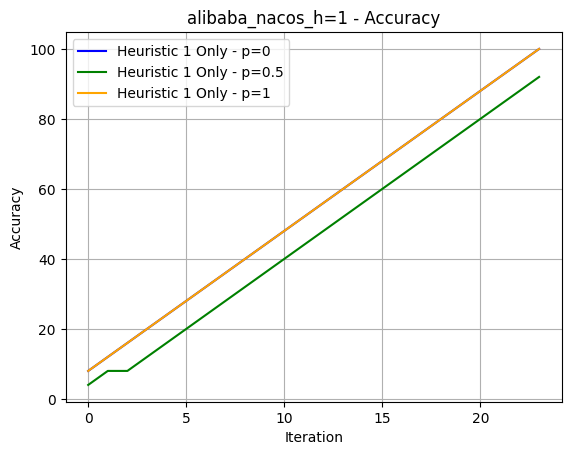

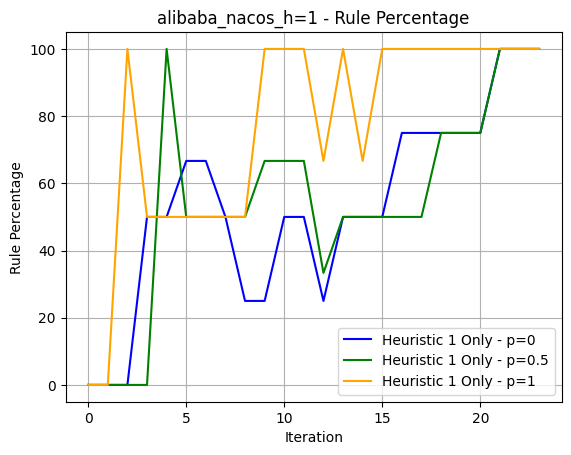

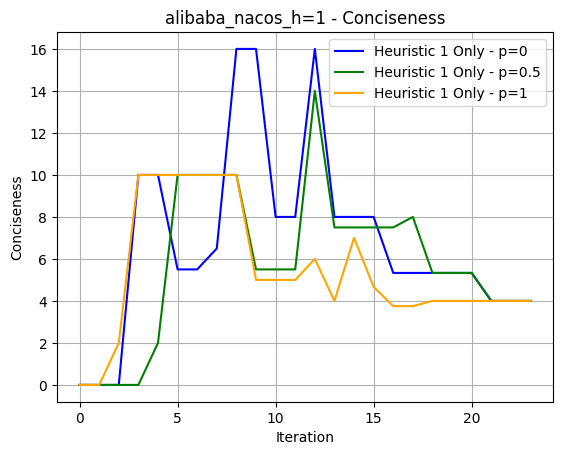

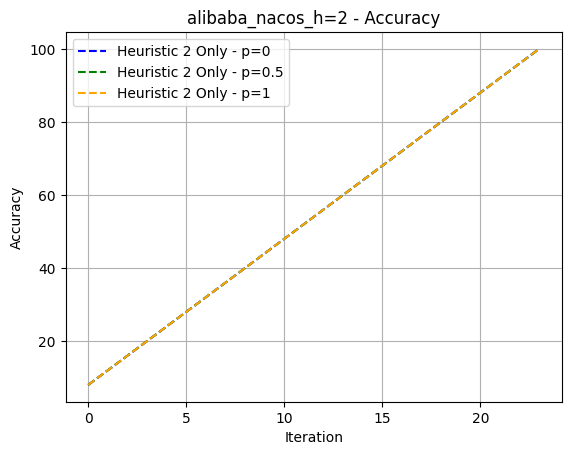

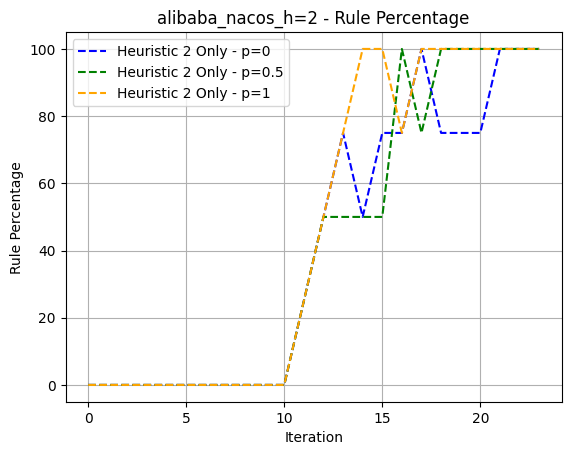

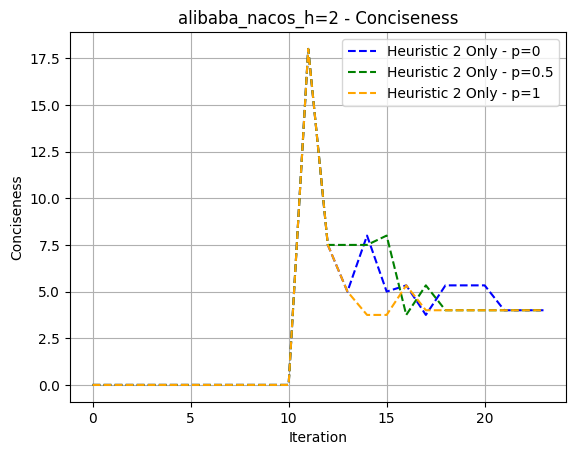

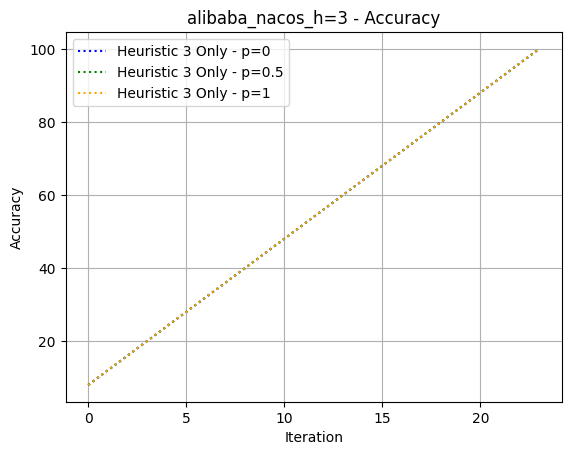

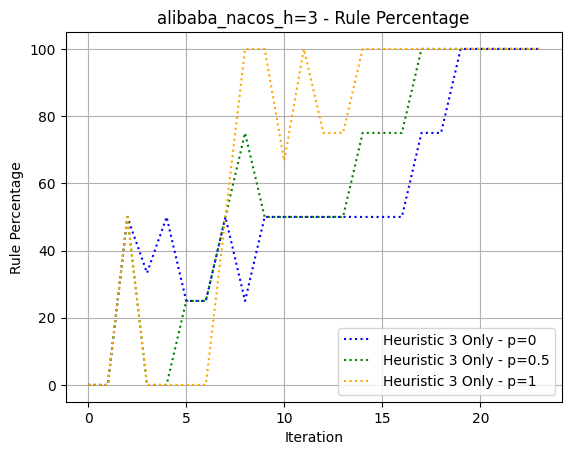

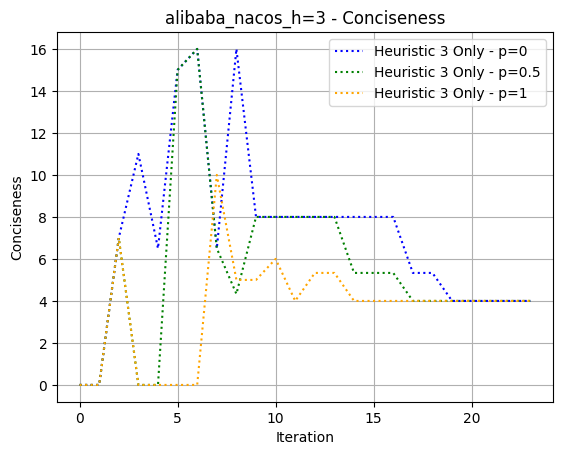

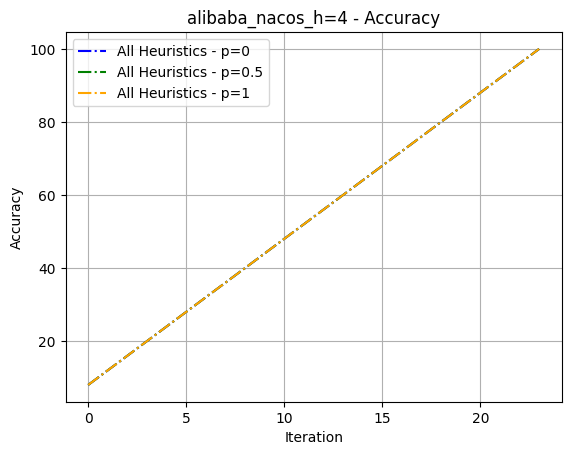

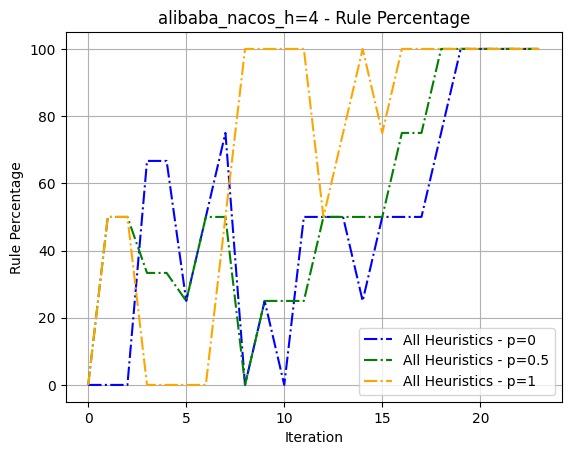

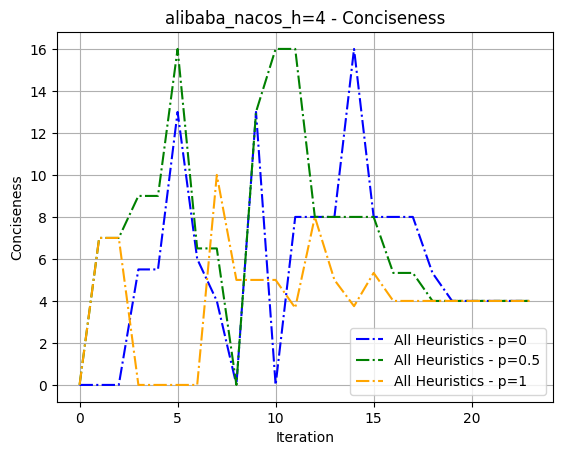

In [36]:
# Plotting for each heuristic variation for Alibaba Nacos
for i in heuristics_range:
    current_dataset = f'alibaba_nacos_h={i}'
    
    # Accuracy
    plot_results(accuracy_results[current_dataset], 'Accuracy', current_dataset)

    # Rule Percentage
    plot_results(rule_percentage_results[current_dataset], 'Rule Percentage', current_dataset)

    # Conciseness
    plot_results(conciseness_results[current_dataset], 'Conciseness', current_dataset)

In [37]:
print(accuracy_results)
print(rule_percentage_results)
print(conciseness_results)

def calculate_averages(rule_percentage_results, conciseness_results):
    average_results = {}
    
    for scenario, heuristics in rule_percentage_results.items():
        average_results[scenario] = {}
        
        for heuristic, p_values in heuristics.items():
            average_results[scenario][heuristic] = {}
            
            for p_value, percentages in p_values.items():
                rule_avg = sum(percentages) / len(percentages) if percentages else 0
                conciseness_avg = (
                    sum(conciseness_results[scenario][heuristic][p_value]) /
                    len(conciseness_results[scenario][heuristic][p_value])
                    if conciseness_results[scenario][heuristic][p_value] else 0
                )
                
                average_results[scenario][heuristic][p_value] = {
                    "rule_percentage_avg": rule_avg,
                    "conciseness_avg": conciseness_avg
                }
    
    return average_results

def print_averages(average_results):
    for scenario, heuristics in average_results.items():
        print(f"Scenario: {scenario}")
        for heuristic, p_values in heuristics.items():
            print(f"  Heuristic: {heuristic}")
            for p_value, averages in p_values.items():
                print(f"    p={p_value}:")
                print(f"      Rule Percentage Average: {averages['rule_percentage_avg']:.2f}")
                print(f"      Conciseness Average: {averages['conciseness_avg']:.2f}")
        print()  # Blank line for better readability


print_averages(calculate_averages(rule_percentage_results, conciseness_results))


{'alibaba_nacos_h=1': {'Heuristic 1 Only': {'p=0': [8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.00000000000001, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0], 'p=0.5': [4.0, 8.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.00000000000001, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0], 'p=1': [8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.00000000000001, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0]}}, 'alibaba_nacos_h=2': {'Heuristic 2 Only': {'p=0': [8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.00000000000001, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0], 'p=0.5': [8.0, 12.0, 16.0, 20.0, 24.0, 28.000000000000004, 32.0, 36.0, 40.0, 44.0, 48.0, 52.0, 56.00000000000001, 60.0, 64.0, 68.0, 72.0, 76.0, 80.0, 84.0, 88.0, 92.0, 96.0, 100.0], 'p=1': [8.

In [38]:
import os
import pandas as pd

# Initialize dictionaries for 'alibaba_nacos'
heuristics_range = range(1, 5)
rule_percentage_results = {f'alibaba_nacos_h={i}': {} for i in heuristics_range}
conciseness_results = {f'alibaba_nacos_h={i}': {} for i in heuristics_range}

# Load the results from the CSV files in 'data/non_random'
for filename in os.listdir('data/non_random'):
    if filename.startswith('alibaba_nacos') and filename.endswith('.csv'):
        df = pd.read_csv(f'data/non_random/{filename}')

        # columns: Scenario,Probability,Iteration,Accuracy,Rule Percentage,Conciseness
        for index, row in df.iterrows():
            scenario = row['Scenario']
            probability = row['Probability']
            iteration = row['Iteration']
            accuracy = row['Accuracy']
            rule_percentage = row['Rule Percentage']
            conciseness = row['Conciseness']

            # Loop through heuristics for 'alibaba_nacos'
            for i in heuristics_range:
                current_dataset = f'alibaba_nacos_h={i}'
                if current_dataset in filename:
                    if scenario not in rule_percentage_results[current_dataset]:
                        rule_percentage_results[current_dataset][scenario] = {}
                        conciseness_results[current_dataset][scenario] = {}

                    if probability not in rule_percentage_results[current_dataset][scenario]:
                        rule_percentage_results[current_dataset][scenario][probability] = []
                        conciseness_results[current_dataset][scenario][probability] = []

                    rule_percentage_results[current_dataset][scenario][probability].append(rule_percentage)
                    conciseness_results[current_dataset][scenario][probability].append(conciseness)

# Find the iteration where rule percentage first goes over 75% and find the corresponding conciseness value
results = []
for i in heuristics_range:
    current_dataset = f'alibaba_nacos_h={i}'
    for scenario in rule_percentage_results[current_dataset]:
        for probability in rule_percentage_results[current_dataset][scenario]:
            rule_percentages = rule_percentage_results[current_dataset][scenario][probability]
            concisenesses = conciseness_results[current_dataset][scenario][probability]
            for idx, rule_percentage in enumerate(rule_percentages):
                if rule_percentage >= 75:
                    results.append({
                        'Dataset': 'alibaba_nacos',
                        'Heuristic': f'Heuristic {i} Only' if i != 4 else 'All Heuristics',
                        'Scenario': scenario,
                        'Probability': probability,
                        'Iteration': idx + 1,
                        'Rule Percentage': rule_percentage,
                        'Conciseness': concisenesses[idx]
                    })
                    break

# Create a DataFrame from the results
df = pd.DataFrame(results)

print(df)

          Dataset         Heuristic          Scenario Probability  Iteration  \
0   alibaba_nacos  Heuristic 1 Only  Heuristic 1 Only         p=0         17   
1   alibaba_nacos  Heuristic 1 Only  Heuristic 1 Only       p=0.5          5   
2   alibaba_nacos  Heuristic 1 Only  Heuristic 1 Only         p=1          3   
3   alibaba_nacos  Heuristic 2 Only  Heuristic 2 Only         p=0         14   
4   alibaba_nacos  Heuristic 2 Only  Heuristic 2 Only       p=0.5         17   
5   alibaba_nacos  Heuristic 2 Only  Heuristic 2 Only         p=1         14   
6   alibaba_nacos  Heuristic 3 Only  Heuristic 3 Only         p=0         18   
7   alibaba_nacos  Heuristic 3 Only  Heuristic 3 Only       p=0.5          9   
8   alibaba_nacos  Heuristic 3 Only  Heuristic 3 Only         p=1          9   
9   alibaba_nacos    All Heuristics    All Heuristics         p=0          8   
10  alibaba_nacos    All Heuristics    All Heuristics       p=0.5         17   
11  alibaba_nacos    All Heuristics    A